In [24]:
# 필요한 라이브러리 임포트
import os
import cv2
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np

# Jupyter Notebook에서 이미지 시각화를 위해 설정
%matplotlib inline

# 데이터 경로 설정
train_image_root = "/data/ephemeral/home/data/train/DCM"  # 이미지 경로 수정하세요

# 이미지 불러오기 함수
def load_image(image_path):
    """이미지를 읽고 RGB로 변환합니다."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

import torch

def get_augmentation():
    """이미지에 적용할 Augmentation 리스트를 반환합니다."""
    transform = A.Compose([
        A.HorizontalFlip(p=1),             # 좌우 반전
        #A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),  # 정규화
        #A.Rotate(limit=50, p=1),           # -30도에서 30도 사이로 회전
        #A.ElasticTransform(alpha=20, sigma=3, p=1),  # 탄성 변형
        A.Emboss(alpha=(0.5, 0.9), strength=(1.0, 1.5), p=1),   # 엠보싱 효과
        A.CLAHE(clip_limit=[2.0, 2.0], tile_grid_size=(8, 8), p=1.0),
        # A.RandomBrightnessContrast(p=1),   # 밝기와 대비 조절
        ToTensorV2()  # Tensor로 변환
    ])
    return transform

def visualize_augmentation(image_path):
    """원본 이미지와 Augmentation된 이미지를 시각화합니다."""
    # 원본 이미지 로드
    original_image = load_image(image_path)

    # Augmentation 적용
    transform = get_augmentation()
    augmented = transform(image=original_image)
    
    # Augmentation 결과는 이제 Tensor이므로 바로 permute 사용 가능
    transformed_image = augmented["image"].permute(1, 2, 0).numpy()

    # 시각화
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")
    
    axes[1].imshow(transformed_image)
    axes[1].set_title("Transformed Image")
    axes[1].axis("off")
    
    plt.tight_layout()
    plt.show()
    
# 하위 폴더에서 이미지 찾기
def get_all_image_paths(root_dir):
    """모든 하위 폴더에서 이미지를 찾습니다."""
    image_paths = []
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(subdir, file))
    return image_paths

# train/DCM 폴더에서 모든 이미지 경로 가져오기
all_image_paths = get_all_image_paths(train_image_root)

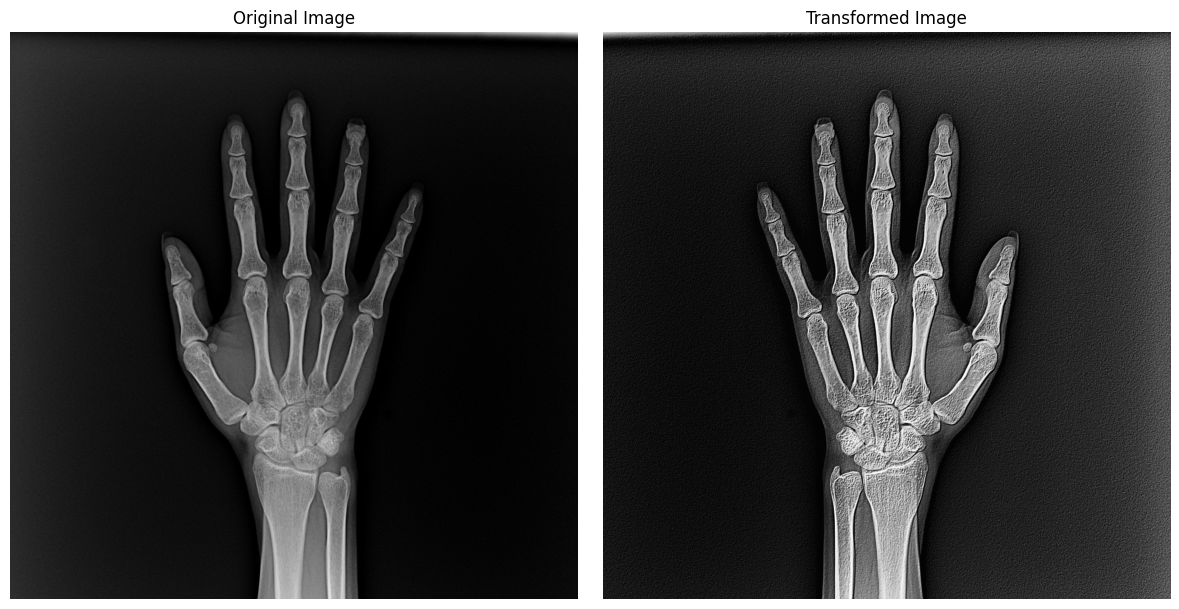

/data/ephemeral/home/data/train/DCM/ID104/image1661823951053.png


In [25]:
#특정폴더에서 랜덤 이미지 불러와서 시각화
# 랜덤으로 하나의 이미지 선택 후 시각화
import random
random_image_path = random.choice(all_image_paths)
visualize_augmentation(random_image_path)
print(random_image_path)